# Instance Segmentation with YOLO11
This notebook has two features:
- Training a YOLO model on the dataset
- Predicting with the trained YOLO model

## Initialization
Inside **.venv/Scripts/activate** run: 
- pip install ultralytics

Link to models: https://docs.ultralytics.com/tasks/segment/
- We used **YOLO11m-seg**

In [1]:
from ultralytics import YOLO
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [5]:
path_to_pre_trained_model = "../src/yolo11m-seg.pt"
dataset = "../data/YOLODataset300/dataset.yaml" 
path_to_trained_yolo_model = "../runs/segment/train/weights/best.pt"

## Training

### Convert Annotations from JSON to YOLO & Split Into Train, Val, and Test Sets

**IMPORTANT!**

You should have **already completed the preprocessing steps**. Path provided below should be the preprocessed json labels
- That is: **<absolute/path/to/labelme_json_dir/>** should be the *absolute path* to **../data/scaled/labels**

Inside **.venv/Scripts/activate** run:

- pip install labelme2yolo
- labelme2yolo --json_dir <absolute/path/to/labelme_json_dir/> --val_size 0.15 --test_size 0.15 --output_format polygon --seed 42

*link to labelme2yolo: https://pypi.org/project/labelme2yolo/*

Inside **../data/scaled/labels** a new directory should have been created:
- --> *data/scaled/labels/YOLODataset*
- Move the YOLODataset dir to the **../data** directory


Finally, you need to **manually change** the **.yaml file** *(../data/YOLODataset/dataset.yaml)* to the **correct path** *(which is the absolute path to the folder (...)/YOLODataset)*, since the package doesn't do that for you.

Example: 

*in dataset.yaml*
```
path: C:\(...)\TRA235\data\YOLODataset300
train: images/train
val: images/val
test: images/test

names:
    0: window
```

### Train Model
Results will be saved to the **root** of the project **/runs/train**


Prerequisites:
- You have configured a path to the pre-trained model, downloaded from the Ultralytics website
- You have completely finished the preprocessing steps and followed the steps above

In [ ]:
torch.cuda.empty_cache()

model = YOLO(path_to_pre_trained_model) # Path to pre-trained model

model.train(data = dataset, imgsz = 640, device = 0, batch = 8, epochs = 50, workers = 1)

## Predict with Model
Results will be saved to the **root** of the project **/runs/predict**


To see more inference arguments, please see:
- https://docs.ultralytics.com/modes/predict/#inference-arguments

In [11]:
# So that images and graphs can be printed in the notebook
%matplotlib inline

In [14]:
def predict_with_yolo(image_path):
    model = YOLO(path_to_trained_yolo_model) # Path to your trained model

    results = model.predict(
        source=image_path,  # Path to the single image you want to predict
        show=False,         # Open image with drawn mask in a new window
        save=False,         # Save image with drawn mask
        conf=0.6,           # Minimum confidence score 
        line_width=1,       # Width of box line
        save_crop=False,    # Save window crops 
        save_txt=False,     # Save bbox and segmentation label
        show_boxes=True,    # Show bbox
        show_labels=True,   # Show labels
        show_conf=True,     # Show confidence score
        classes=[0],        # Which classes to include (we only have 1, hence [0])
        iou=0.5             # Minimum IoU score
    )                       # More can be configured, please see provided link above

    masks = results[0].masks.data  

    # Display every window:
    for mask in masks:
        mask_np = mask.cpu().numpy()
        plt.imshow(mask_np, cmap="gray")  
        plt.show()

    img_with_predictions = results[0].plot()
    plt.imshow(cv2.cvtColor(img_with_predictions, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Predict Single Image


image 1/1 c:\Users\mikae\Desktop\TRA235\notebooks\..\data\scaled\images\C_Mer_02_aug_0.jpg: 640x640 1 window, 104.2ms
Speed: 4.0ms preprocess, 104.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


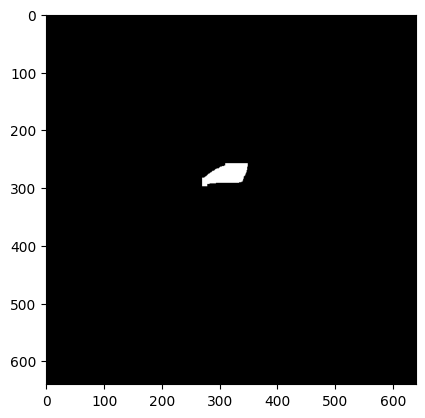

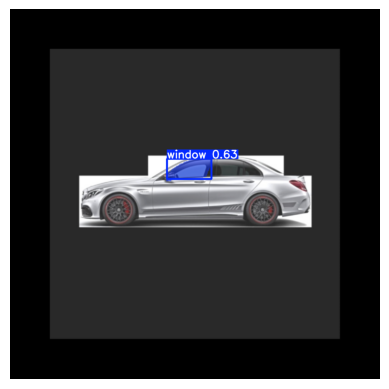

In [15]:
path_to_single_image_predict = "../data/scaled/images/C_Mer_02_aug_0.jpg"
predict_with_yolo(path_to_single_image_predict)